## Prediction of Canada Per Capita Income using Linear Regression

In [1]:
# required modules 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
# loading of a csv file into pandas dataframe
df = pd.read_csv(r"C:\Users\chand\Machine Learning\canada_per_capita_income.csv")


In [3]:
# top 5 rows
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [4]:
#bottom 5 rows
df.tail()

,year,per capita income (US$)
42,2012,42665.25597
43,2013,42676.46837
44,2014,41039.89360
45,2015,35175.18898
46,2016,34229.19363


In [5]:
df.shape

(47, 2)

There are 47 rows & 2 columns

In [6]:
df.isnull().sum()

year                       0
per capita income (US$)    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     47 non-null     int64  
 1   per capita income (US$)  47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 880.0 bytes


There is no null values or missing values. Also, datatype for column are numeric, hence, suitable for machine learning model.

### Let's check the relation between the independent variable (feature) & dependent variable (label)

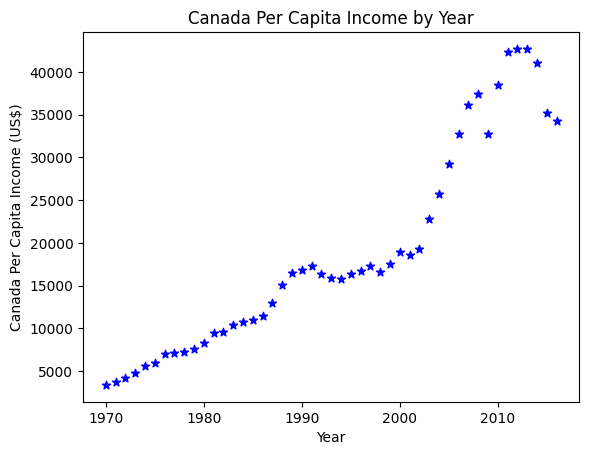

In [8]:
plt.xlabel('Year')
plt.ylabel('Canada Per Capita Income (US$)')
plt.title('Canada Per Capita Income by Year')

plt.scatter(df['year'], df['per capita income (US$)'], color = 'blue', marker = '*')

### Label is almost related with the feature linearly. So, we can use Linear Regression Model (Supervised Learning)

In [9]:
# import scikit module
from sklearn import linear_model
model = linear_model.LinearRegression()

In [10]:
# fitting (learning) of model
model.fit(df[['year']], df['per capita income (US$)'])

LinearRegression()

In [11]:
model.predict([[2020]])

array([41288.69409442])

In [12]:
model.coef_

array([828.46507522])

In [13]:
model.intercept_

-1632210.7578554575

In [14]:
# income for a random year = 2020, using coefficient & intercept

828.46507522*2020 + (-1632210.7578554575)

41288.694088942604

### Actual datasets VS Model

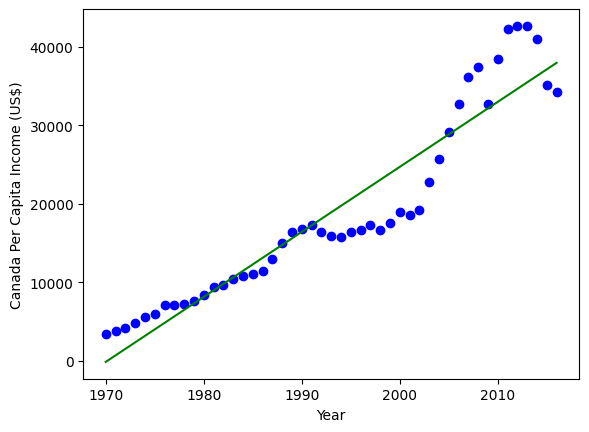

In [15]:
plt.xlabel('Year')
plt.ylabel('Canada Per Capita Income (US$)')
plt.scatter(df['year'], df['per capita income (US$)'], color = 'blue')
plt.plot(df['year'], model.predict(df[['year']]), color = 'g')

In [16]:
# using random module, perform some prediction with the model
import random

In [17]:
df_year = pd.DataFrame()
year = []

for i in range(5):
    year.append(random.randint(2017, 2030))
    
year

[2022, 2022, 2022, 2030, 2021]

In [18]:
df_year['year'] = year
df_year

,year
0,2022
1,2022
2,2022
3,2030
4,2021


In [19]:
i = model.predict(df_year[['year']])
i

array([42945.62424486, 42945.62424486, 42945.62424486, 49573.34484664,
       42117.15916964])

In [20]:
df_year['Predicted Income'] = i
df_year

,year,Predicted Income
0,2022,42945.624245
1,2022,42945.624245
2,2022,42945.624245
3,2030,49573.344847
4,2021,42117.159170


In [21]:
df_year.sort_values(by = ['year'])

,year,Predicted Income
4,2021,42117.159170
0,2022,42945.624245
1,2022,42945.624245
2,2022,42945.624245
3,2030,49573.344847


Conclusion, Here, I have created a dataframe which contains some random year along with the predicted per capita income for Canada!!!